In [4]:
import numpy as np
import pandas as pd

import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
import warnings
warnings.filterwarnings("ignore")

### This is a compulsary import when use Plotly

In [6]:
import plotly.io as pio
pio.renderers.default = 'iframe'  # Use 'iframe' renderer for Kaggle notebooks

In [47]:
pio.templates.default = 'plotly_dark'

In [7]:
df=pd.read_csv('/kaggle/input/corona-virus-report/country_wise_latest.csv')

In [8]:
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [9]:
df.shape

(187, 15)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [11]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


In [14]:
df.nunique()

Country/Region            187
Confirmed                 184
Deaths                    150
Recovered                 178
Active                    173
New cases                 122
New deaths                 38
New recovered             103
Deaths / 100 Cases        145
Recovered / 100 Cases     177
Deaths / 100 Recovered    155
Confirmed last week       183
1 week change             162
1 week % increase         169
WHO Region                  6
dtype: int64

------------

# EDA || Exploratory Data Analysis and Visualization

---------

---------------

## 1) Which Countries had the highest number of confirmed cases?

### i) My Solution

In [15]:
case=df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(20).reset_index()

case

,Country/Region,Confirmed
0,US,4290259
1,Brazil,2442375
2,India,1480073
3,Russia,816680
4,South Africa,452529
5,Mexico,395489
6,Peru,389717
7,Chile,347923
8,United Kingdom,301708
9,Iran,293606


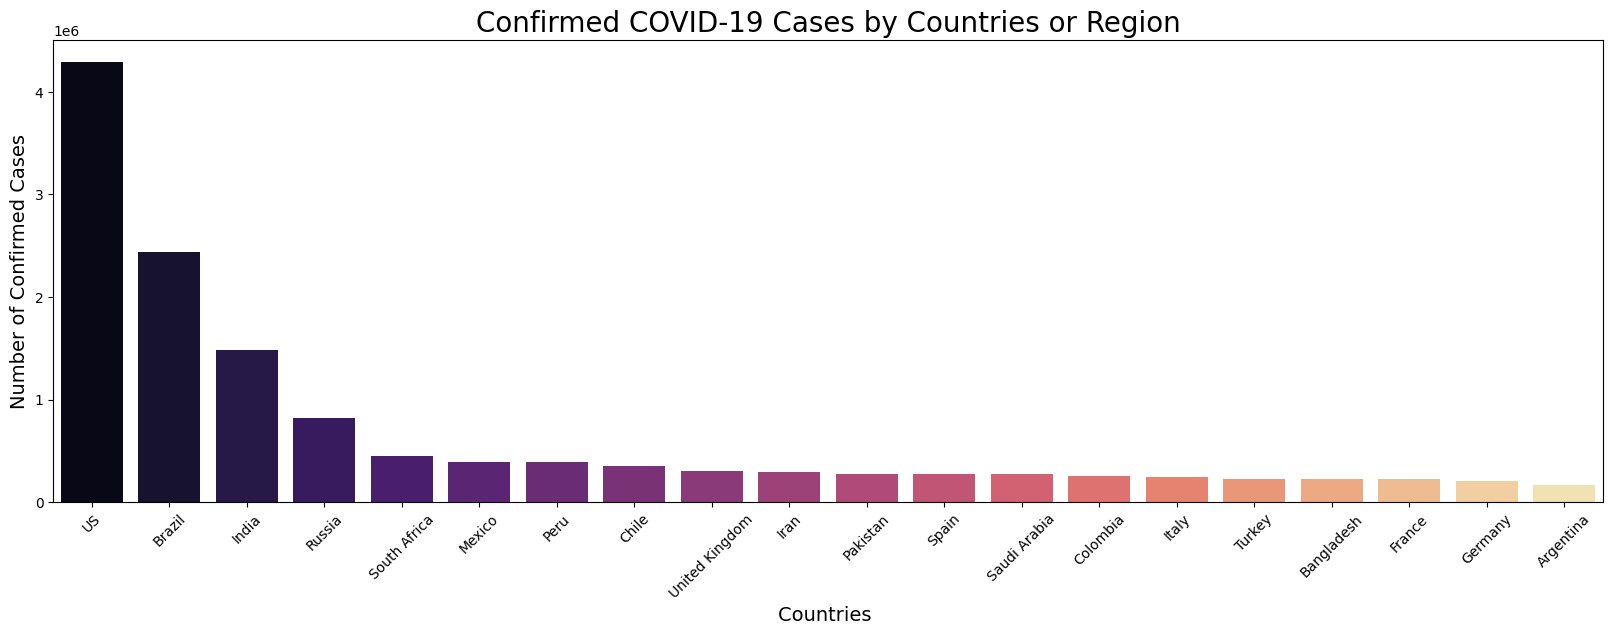

In [16]:
plt.figure(figsize=(20,6))

sn.barplot(x='Country/Region', y='Confirmed', data=case, palette="magma")


plt.title('Confirmed COVID-19 Cases by Countries or Region', fontsize=20)
plt.xlabel('Countries ', fontsize=14)
plt.ylabel('Number of Confirmed Cases', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### ii) Other Solution

In [17]:
high_confirm_cases=df.nlargest(10, 'Confirmed')

high_confirm_cases

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
173,US,4290259,148011,1325804,2816444,56336,1076,27941,3.45,30.90,11.16,3834677,455582,11.88,Americas
23,Brazil,2442375,87618,1846641,508116,23284,614,33728,3.59,75.61,4.74,2118646,323729,15.28,Americas
79,India,1480073,33408,951166,495499,44457,637,33598,2.26,64.26,3.51,1155338,324735,28.11,South-East Asia
138,Russia,816680,13334,602249,201097,5607,85,3077,1.63,73.74,2.21,776212,40468,5.21,Europe
154,South Africa,452529,7067,274925,170537,7096,298,9848,1.56,60.75,2.57,373628,78901,21.12,Africa
111,Mexico,395489,44022,303810,47657,4973,342,8588,11.13,76.82,14.49,349396,46093,13.19,Americas
132,Peru,389717,18418,272547,98752,13756,575,4697,4.73,69.93,6.76,357681,32036,8.96,Americas
35,Chile,347923,9187,319954,18782,2133,75,1859,2.64,91.96,2.87,333029,14894,4.47,Americas
177,United Kingdom,301708,45844,1437,254427,688,7,3,15.19,0.48,3190.26,296944,4764,1.60,Europe
81,Iran,293606,15912,255144,22550,2434,212,1931,5.42,86.90,6.24,276202,17404,6.30,Eastern Mediterranean


In [48]:
px.bar(high_confirm_cases,
      x='Country/Region',
      y='Confirmed',
      title='Top 10 Countries with the Highest Number of Confirmed cases',
      color='Country/Region')

---------------

## 2) Distribution of Confirmed cases across different WHO regions?

#### i) My Solution

In [19]:
case_who=df.groupby('WHO Region')['Confirmed'].sum().sort_values(ascending=False).reset_index()

case_who

,WHO Region,Confirmed
0,Americas,8839286
1,Europe,3299523
2,South-East Asia,1835297
3,Eastern Mediterranean,1490744
4,Africa,723207
5,Western Pacific,292428


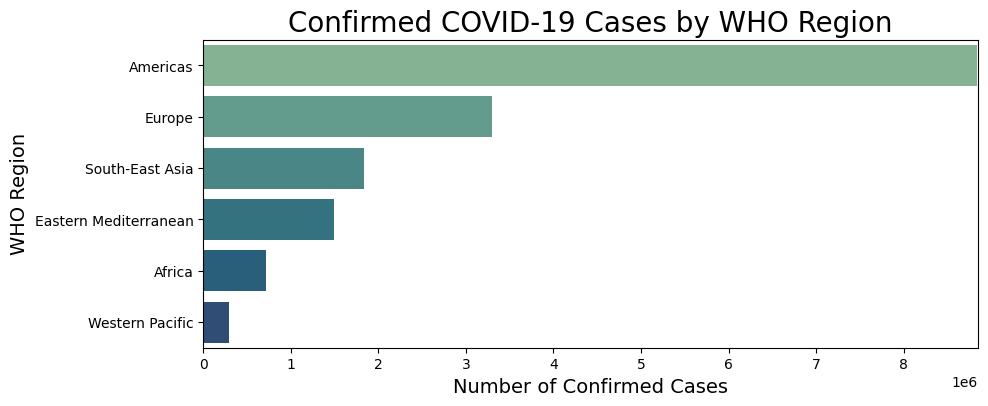

In [20]:
plt.figure(figsize=(10, 4))
sn.barplot(y='WHO Region', x='Confirmed', data=case_who, palette="crest")

plt.title('Confirmed COVID-19 Cases by WHO Region', fontsize=20)
plt.xlabel('Number of Confirmed Cases', fontsize=14)
plt.ylabel('WHO Region', fontsize=14)
plt.xlim(0, case_who['Confirmed'].max() + 10000)  # Adding some padding to the x-axis
plt.show()

#### ii) Actual Solution

In [21]:
df['WHO Region'].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [49]:
px.pie(df, 
      values='Confirmed',
      names='WHO Region',
      title='Distribution of Confirmed Cases across the WHO Region',
      color_discrete_sequence=px.colors.sequential.Viridis_r)

--------------

## 3) What were the trends in new cases, new deaths and new recoveries in each country?

In [50]:
px.scatter(df,
          x='New cases',
          y='New deaths',
          size='New recovered',
          color='Country/Region',
          title='Trends in New Cases, New Deaths and New Recoveries across the Countries')

## 4) What was the 1-week percentage increase in confirmed cases for each country?

#### i) My Solutions

In [24]:
week_case=df.groupby('Country/Region')['1 week % increase'].sum().sort_values(ascending=False).reset_index().head(20)

week_case

,Country/Region,1 week % increase
0,Papua New Guinea,226.32
1,Gambia,191.07
2,Bahamas,119.54
3,Zimbabwe,57.85
4,Libya,42.78
5,Ethiopia,42.52
6,Botswana,41.57
7,Lesotho,40.67
8,Suriname,37.44
9,Costa Rica,37.34


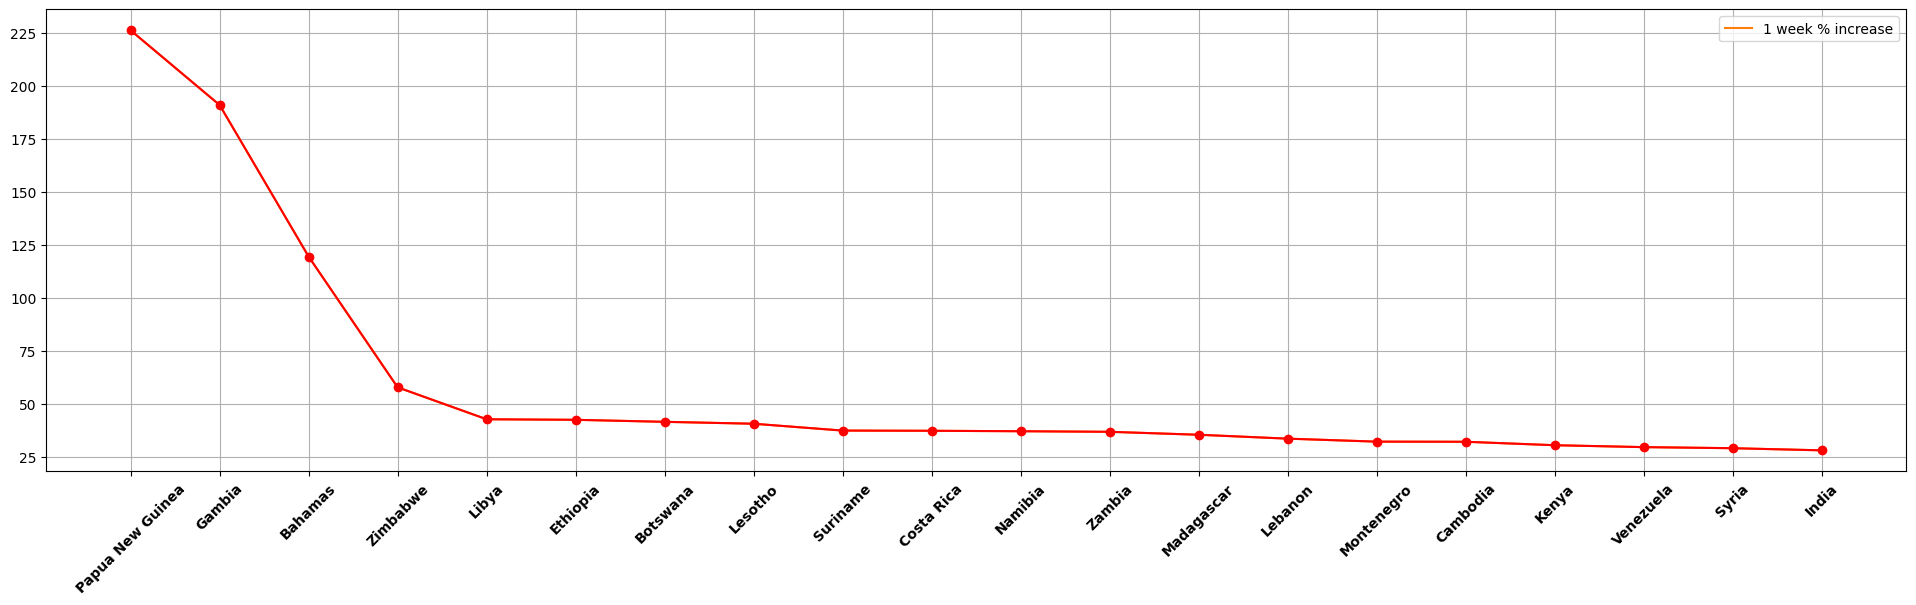

In [25]:
plt.figure(figsize=(24,6))

plt.plot('Country/Region', '1 week % increase', data=week_case, color='tab:orange')
plt.plot('Country/Region', '1 week % increase', data=week_case, marker="o", color="red")

plt.grid()
plt.legend(["1 week % increase"], loc ="upper right")
plt.xticks(rotation = 45, fontweight = 'bold')
plt.show()

#### ii) Actual Solutions

In [51]:
px.choropleth(df,
             locations='Country/Region',
             locationmode='country names',
             color='1 week % increase',
             hover_name='Country/Region',
             title='1 Week % increase in confirmed cases by country',
             color_continuous_scale=px.colors.sequential.Magenta)

------

## 5) How do death rates per 100 confirmed cases vary by WHO Region?

#### i) My Solution

In [27]:
death_case=df.groupby('WHO Region')['Deaths / 100 Cases'].sum().sort_values(ascending=False).reset_index()

death_case

,WHO Region,Deaths / 100 Cases
0,Europe,235.11
1,Africa,110.71
2,Americas,106.84
3,Eastern Mediterranean,78.39
4,Western Pacific,20.64
5,South-East Asia,12.96


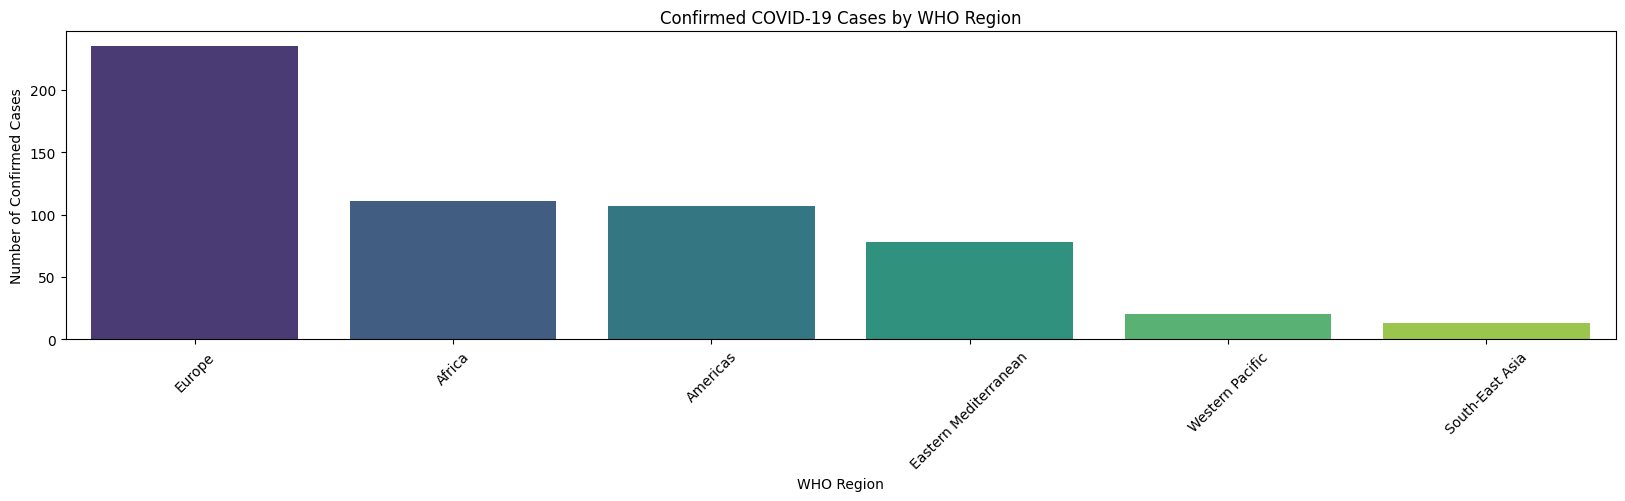

In [28]:
plt.figure(figsize=(20, 4))
sn.barplot(x='WHO Region', y='Deaths / 100 Cases', data=death_case, palette="viridis")

plt.title('Confirmed COVID-19 Cases by WHO Region')
plt.ylabel('Number of Confirmed Cases')
plt.xlabel('WHO Region')

plt.xticks(rotation=45)
plt.show()

#### ii) Actual Solution

In [52]:
px.box(df,
      x='WHO Region',
      y='Deaths / 100 Cases',
       color='WHO Region',
       title='Death Rates per 100 confirmed cases by WHO Region',
      )

----------------

## 6) What was the mortality rate (deaths per 100 confirmed cases) for each country?

#### i) My solutiom

In [30]:
death_case_m=df.groupby('Country/Region')['Deaths / 100 Cases'].sum().sort_values(ascending=False).reset_index().head(20)

death_case_m

,Country/Region,Deaths / 100 Cases
0,Yemen,28.56
1,United Kingdom,15.19
2,Belgium,14.79
3,Italy,14.26
4,France,13.71
5,Hungary,13.40
6,Netherlands,11.53
7,Mexico,11.13
8,Spain,10.44
9,Western Sahara,10.00


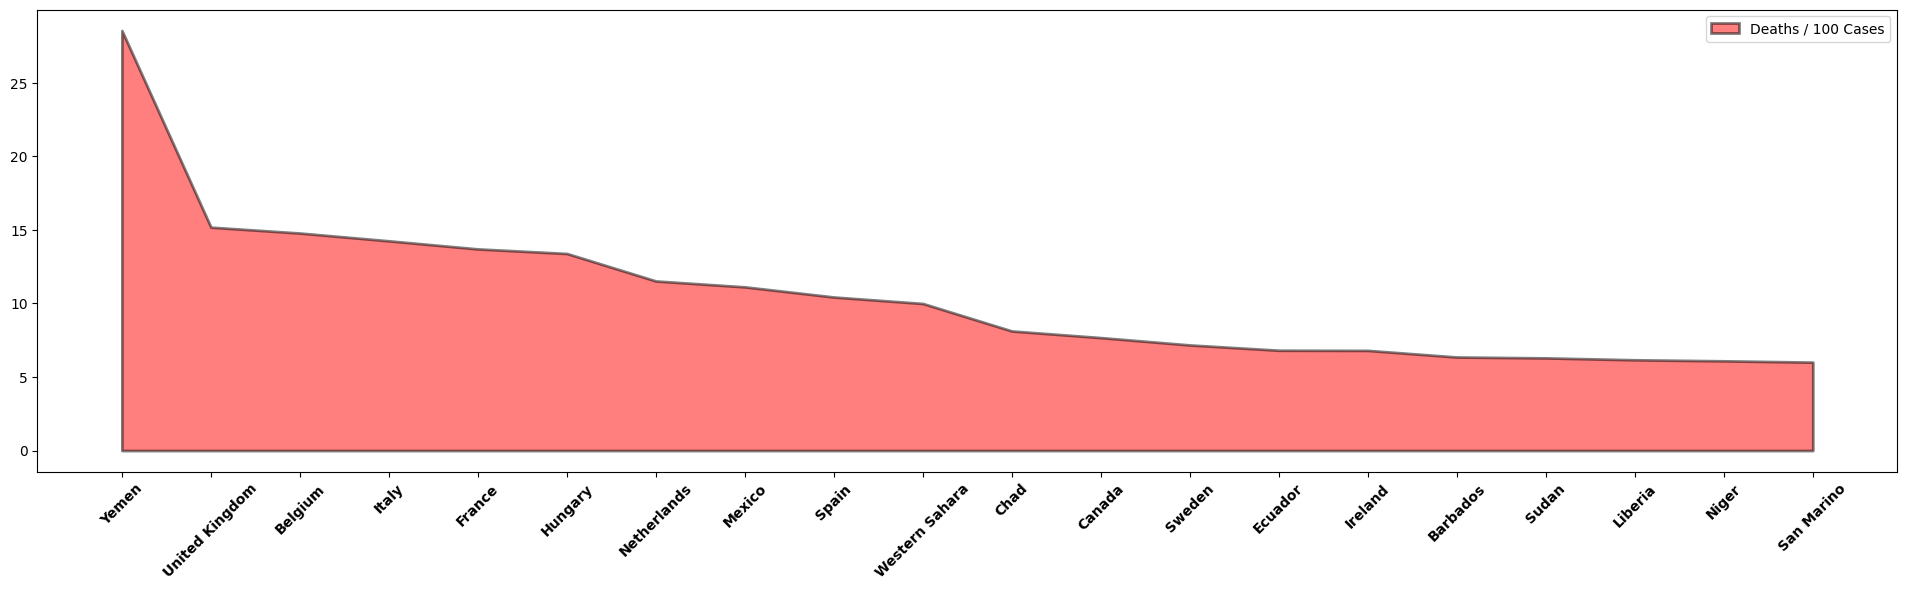

In [31]:
plt.figure(figsize=(24,6))

plt.fill_between('Country/Region', 'Deaths / 100 Cases', data=death_case_m,color='red', alpha=0.5,
                  edgecolor='black', linewidth=2)

plt.legend(["Deaths / 100 Cases"], loc ="upper right")
plt.xticks(rotation = 45, fontweight = 'bold')
plt.show()

In [53]:
px.choropleth(df,
             locations='Country/Region',
            color='Deaths / 100 Cases',
             hover_name='Country/Region',
             locationmode='country names',
             title='Mortality Rate per 100 Confirmed cases by Country',
             color_continuous_scale=px.colors.sequential.Reds)

-------------------

## 7) How many countries are in each WHO Region?

In [38]:
who_region_count=df['WHO Region'].value_counts().reset_index()

who_region_count

,WHO Region,count
0,Europe,56
1,Africa,48
2,Americas,35
3,Eastern Mediterranean,22
4,Western Pacific,16
5,South-East Asia,10


In [54]:
px.bar(who_region_count,
      y='WHO Region',
      x='count',
      title='Number of Countries in WHO Region',
      color='WHO Region')

## 8) Treemap of COVID-19 confirmed cases by WHO Region and country

In [55]:
px.treemap(df,
          path=['WHO Region', 'Country/Region'],
          values='Confirmed',
          title='Treemap of COVID-19 confirmed cases by WHO Region and country',
          height=800)

------------------